<a href="https://colab.research.google.com/github/201524495/2021_FSRnT/blob/main/Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  # 0으로 채워진 (len(swquences), dimension) 크기의 행렬을 만듭니다.
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0 # results[i]의 특정 인덱스만 1로 설정합니다.
  return results

train_data = multi_hot_sequences(train_data, dimension = NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension = NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

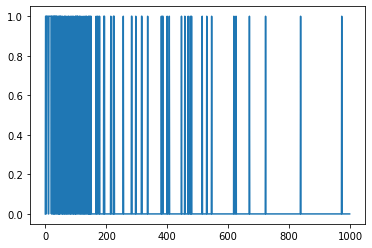

In [ ]:
plt.plot(train_data[0])

In [ ]:
# Overfitting example

baseline_model = keras.Sequential([
      # '.summary' 메서드 때문에 'input_shape'가 필요
      keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer = 'adam',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs = 20,
                                      batch_size = 512,
                                      validation_data = (test_data, test_labels),
                                      verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.5558 - accuracy: 0.7286 - binary_crossentropy: 0.5558 - val_loss: 0.4182 - val_accuracy: 0.8186 - val_binary_crossentropy: 0.4182
Epoch 2/20
49/49 - 0s - loss: 0.3607 - accuracy: 0.8476 - binary_crossentropy: 0.3607 - val_loss: 0.3444 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3444
Epoch 3/20
49/49 - 0s - loss: 0.3178 - accuracy: 0.8683 - binary_crossentropy: 0.3178 - val_loss: 0.3305 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3305
Epoch 4/20
49/49 - 0s - loss: 0.3053 - accuracy: 0.8730 - binary_crossentropy: 0.3053 - val_loss: 0.3270 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3270
Epoch 5/20
49/49 - 0s - loss: 0.2996 - accuracy: 0.8759 - binary_crossentropy: 0.2996 - val_loss: 0.3371 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3371
Epoch 6/20
49/49 - 0s - loss: 0.2973 - accuracy: 0.8782 - binary_crossentropy: 0.2973 - val_loss: 0.3265 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3265
Epoch 7/20
49/49 - 0s - loss

In [ ]:
#작은 모델 만들기 - size : 4

smaller_model = keras.Sequential([
            keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
            keras.layers.Dense(4, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs = 20,
                                    batch_size = 512,
                                    validation_data = (test_data, test_labels),
                                    verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6547 - accuracy: 0.6190 - binary_crossentropy: 0.6547 - val_loss: 0.5991 - val_accuracy: 0.7121 - val_binary_crossentropy: 0.5991
Epoch 2/20
49/49 - 0s - loss: 0.5390 - accuracy: 0.7828 - binary_crossentropy: 0.5390 - val_loss: 0.4874 - val_accuracy: 0.8185 - val_binary_crossentropy: 0.4874
Epoch 3/20
49/49 - 0s - loss: 0.4298 - accuracy: 0.8438 - binary_crossentropy: 0.4298 - val_loss: 0.3957 - val_accuracy: 0.8468 - val_binary_crossentropy: 0.3957
Epoch 4/20
49/49 - 0s - loss: 0.3590 - accuracy: 0.8618 - binary_crossentropy: 0.3590 - val_loss: 0.3548 - val_accuracy: 0.8550 - val_binary_crossentropy: 0.3548
Epoch 5/20
49/49 - 0s - loss: 0.3290 - accuracy: 0.8692 - binary_crossentropy: 0.3290 - val_loss: 0.3403 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3403
Epoch 6/20
49/49 - 0s - loss: 0.3151 - accuracy: 0.8725 - binary_crossentropy: 0.3151 - val_loss: 0.3342 - val_accuracy: 0.8585 - val_binary_crossentropy: 0.3342
Epoch 7/20
49/49 - 0s - loss

In [ ]:
# 큰 모델 만들기 - size : 512

bigger_model = keras.models.Sequential([
          keras.layers.Dense(512, activation = 'relu', input_shape = (NUM_WORDS,)),
          keras.layers.Dense(512, activation='relu'),
          keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs = 20,
                                  batch_size = 512,
                                  validation_data = (test_data, test_labels),
                                  verbose = 2)

Epoch 1/20
49/49 - 3s - loss: 0.4142 - accuracy: 0.8137 - binary_crossentropy: 0.4142 - val_loss: 0.3446 - val_accuracy: 0.8535 - val_binary_crossentropy: 0.3446
Epoch 2/20
49/49 - 2s - loss: 0.2894 - accuracy: 0.8798 - binary_crossentropy: 0.2894 - val_loss: 0.3261 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3261
Epoch 3/20
49/49 - 2s - loss: 0.2257 - accuracy: 0.9118 - binary_crossentropy: 0.2257 - val_loss: 0.3409 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3409
Epoch 4/20
49/49 - 2s - loss: 0.1140 - accuracy: 0.9636 - binary_crossentropy: 0.1140 - val_loss: 0.4223 - val_accuracy: 0.8418 - val_binary_crossentropy: 0.4223
Epoch 5/20
49/49 - 2s - loss: 0.0306 - accuracy: 0.9946 - binary_crossentropy: 0.0306 - val_loss: 0.5294 - val_accuracy: 0.8469 - val_binary_crossentropy: 0.5294
Epoch 6/20
49/49 - 2s - loss: 0.0060 - accuracy: 0.9998 - binary_crossentropy: 0.0060 - val_loss: 0.5966 - val_accuracy: 0.8493 - val_binary_crossentropy: 0.5966
Epoch 7/20
49/49 - 2s - loss

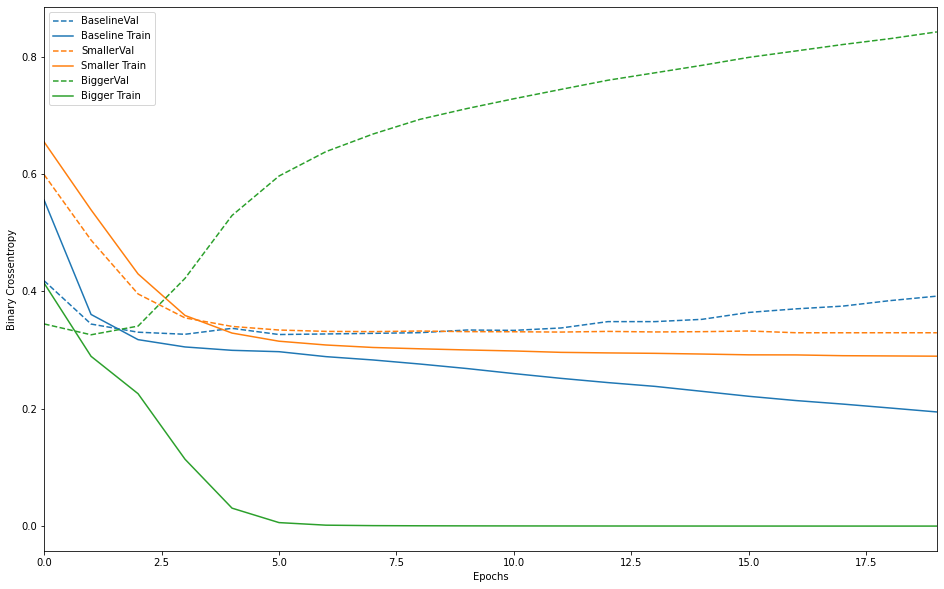

In [ ]:
# train_loss , validation_loss 그래프 그리기
# 낮은 검증 손실이 더 좋은 모델 train_loss , validation_loss 그래프 그리기
# 낮은 검증 손실이 더 좋은 모델

def plot_history(histories, key = 'binary_crossentropy'):
  plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                           '--', label = name.title() + 'Val')
                               plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
                                        

def plot_history(histories, key = 'binary_crossentropy'):
  plt.figure(figsize=(16, 10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label = name.title() + 'Val')
    plt.plot(history.epoch, history.history[key], color = val[0].get_color(),
             label = name.title() + ' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
                ('smaller', smaller_history),
                ('bigger', bigger_history)])
# 네트워크 용량이 많을수록 훈련 세트를 더 빠르게 모델링 가능(훈련 손실 감소)
# 하지만 더 쉽게 Overfitting 일어나 ( 훈련 손실과 검증 손실 사이에 큰 차이 발생)

In [ ]:
# Overfitting 방지
# L1 규제 : 가중치의 절댓값에 비례하는 비용 추가. (잘 사용하지 않음)
# L2 규제 : 가중치의 제곱에 비례하는 비용이 추가. (주로 사용)
# L1 규제는 일부 파라미터를 0으로 만듦, L2 규제는 완전히 0으로 만들지는 않는다. 

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                       activation = 'relu', input_shape = (NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer = keras.regularizers.l2(0.001),
                       activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

l2_model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs = 20,
                                batch_size = 512,
                                validation_data = (test_data, test_labels),
                                verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6103 - accuracy: 0.7171 - binary_crossentropy: 0.5657 - val_loss: 0.4665 - val_accuracy: 0.8235 - val_binary_crossentropy: 0.4232
Epoch 2/20
49/49 - 0s - loss: 0.4055 - accuracy: 0.8499 - binary_crossentropy: 0.3623 - val_loss: 0.3860 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3433
Epoch 3/20
49/49 - 0s - loss: 0.3613 - accuracy: 0.8687 - binary_crossentropy: 0.3193 - val_loss: 0.3715 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3305
Epoch 4/20
49/49 - 0s - loss: 0.3481 - accuracy: 0.8729 - binary_crossentropy: 0.3079 - val_loss: 0.3767 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3374
Epoch 5/20
49/49 - 0s - loss: 0.3434 - accuracy: 0.8744 - binary_crossentropy: 0.3048 - val_loss: 0.3653 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3276
Epoch 6/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8766 - binary_crossentropy: 0.3022 - val_loss: 0.3763 - val_accuracy: 0.8547 - val_binary_crossentropy: 0.3401
Epoch 7/20
49/49 - 0s - loss

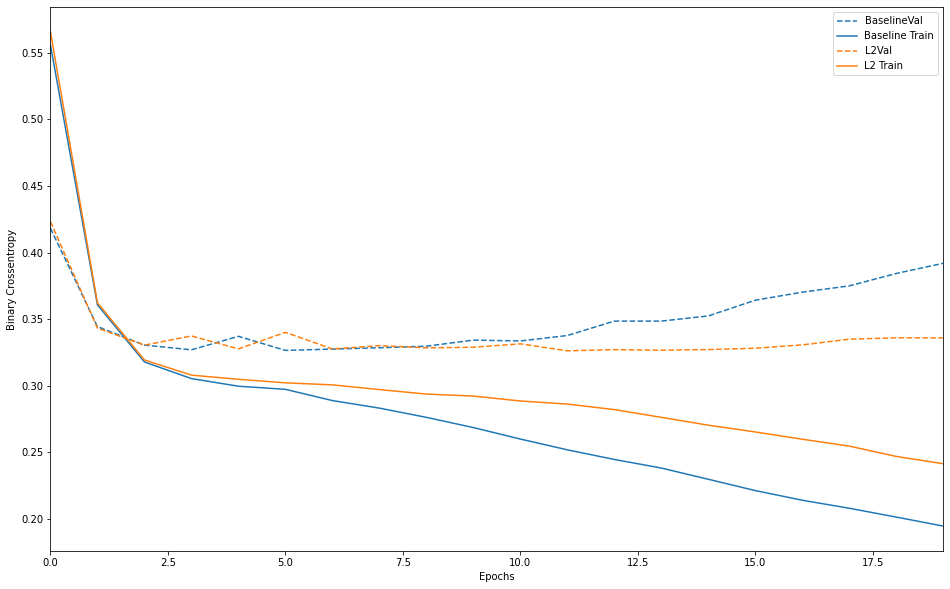

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# L2 규제를 적용한 모델이 기본 모델보다 과적합에 훨씬 잘 견디고 있다. 

In [ ]:
# 드롭아웃 추가하기
# 특정 벡터를 출력하는 층이 있을 때, 드롭아웃을 적용하면 몇 개의 원소가 랜덤하게 0이 된다.
# ex)  [0.2, 0.5, 1.3, 0.8, 1.1] -> [0.0, 0.5, 1.3, 0,0, 1.1]

dpt_model = keras.models.Sequential([
   keras.layers.Dense(16, activation = 'relu', input_shape = (NUM_WORDS,)),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(16, activation = 'relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(1, activation = 'sigmoid')
])

dpt_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs = 20,
                                  batch_size = 512,
                                  validation_data = (test_data, test_labels),
                                  verbose = 2)

Epoch 1/20
49/49 - 1s - loss: 0.6847 - accuracy: 0.5527 - binary_crossentropy: 0.6847 - val_loss: 0.6411 - val_accuracy: 0.7257 - val_binary_crossentropy: 0.6411
Epoch 2/20
49/49 - 0s - loss: 0.6015 - accuracy: 0.6748 - binary_crossentropy: 0.6015 - val_loss: 0.4826 - val_accuracy: 0.8166 - val_binary_crossentropy: 0.4826
Epoch 3/20
49/49 - 0s - loss: 0.4984 - accuracy: 0.7706 - binary_crossentropy: 0.4984 - val_loss: 0.3937 - val_accuracy: 0.8433 - val_binary_crossentropy: 0.3937
Epoch 4/20
49/49 - 0s - loss: 0.4364 - accuracy: 0.8129 - binary_crossentropy: 0.4364 - val_loss: 0.3520 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.3520
Epoch 5/20
49/49 - 0s - loss: 0.3996 - accuracy: 0.8367 - binary_crossentropy: 0.3996 - val_loss: 0.3344 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3344
Epoch 6/20
49/49 - 0s - loss: 0.3766 - accuracy: 0.8476 - binary_crossentropy: 0.3766 - val_loss: 0.3257 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3257
Epoch 7/20
49/49 - 0s - loss

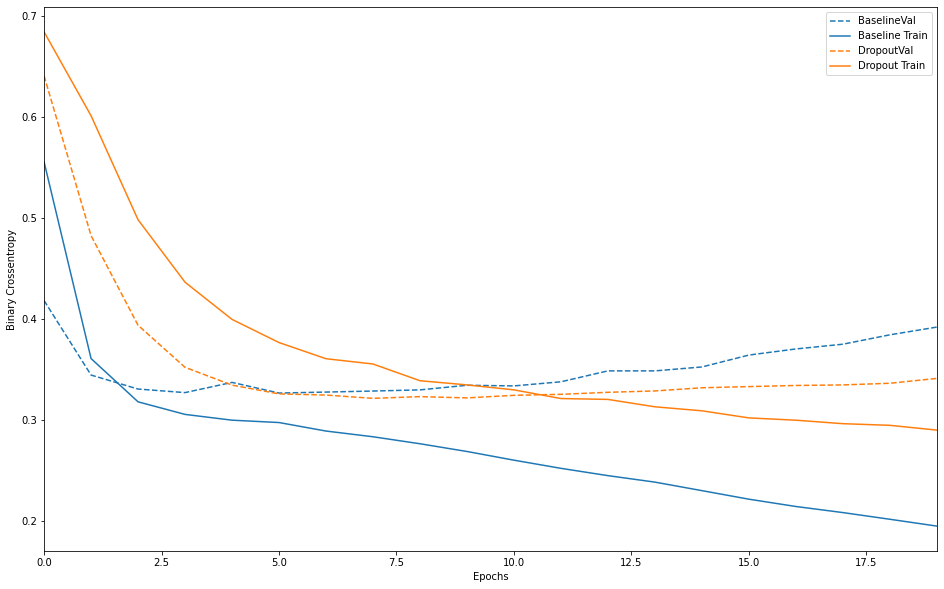

In [ ]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])
# 기존 모델보다 drop out 모델이 더 향상된 모습을 보임

In [ ]:
# 신경망에서 Overfitting을 방지하기 위해 많이 사용하는 방식
# 더 많은 훈련 데이터를 수집
# 네트워크 사용량 줄임
# 가중치 규제를 추가
# 드롭아웃 추가

In [ ]:
# data-augmentation : 데이터 증식
# 원래 데이터를 부풀려서 성능을 더 좋게 만든다는 뜻
# 1. preprocessing과 argumentation을 하면, 거의 성능이 좋아진다.
# 2. 원본에 추가되는 개념이니 성능이 떨어지지 않는다.
# 3. 쉅고 패턴이 정해져있다. ( 사진의 경우 좌우반전, 다양한 사이즈 )

# batch normalization : 배치 정규화
# 미니배치의 편균과 분산을 이용해서 정규화 한 뒤에, scale 및 shift를 감마값, 베타값을 통해 실행한다.
# 이 때 감마와 베타 값은 학습 가능한 변수이다. 
# 즉, Backpropagation을 통해서 학습이 된다. 